# 2.1 Outcomes and Variables / 結果と変数

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1)

In [17]:
die = pd.DataFrame([1, 2, 3, 4, 5, 6])
sum_of_dice = die.sample(2, replace=True).sum().loc[0]  # サイコロを2個ふる
print('Sum of dice is', sum_of_dice)

Sum of dice is 10


In [18]:
# 50回繰り返す
trial = 50
result = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]
#print the first 10 results

#print(result)
print(result[:10])


[6, 6, 7, 3, 11, 7, 8, 9, 9, 8]


In [19]:
# 50回繰り返した結果の頻度を集計する
freq = pd.DataFrame(result)[0].value_counts()
sort_freq = freq.sort_index()
print(sort_freq)

2     1
3     4
4     4
5     8
6     7
7     5
8     8
9     6
10    4
11    3
Name: 0, dtype: int64


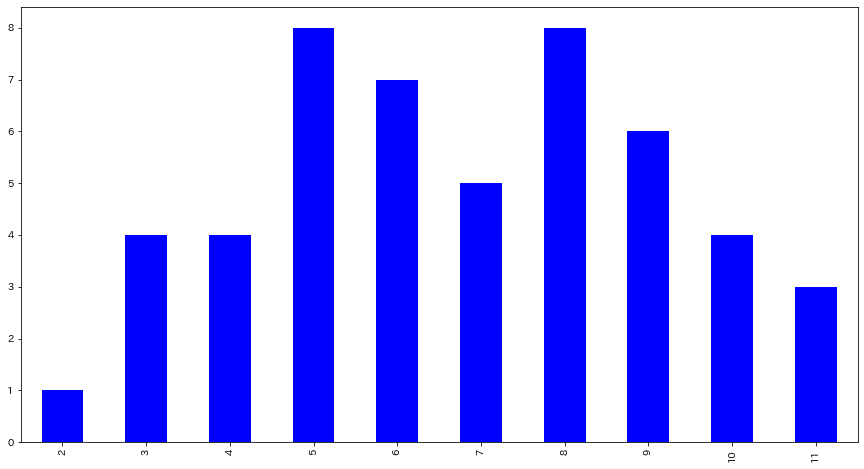

In [20]:
#plot the bar chart base on the result　/ 棒グラフで表す
sort_freq.plot(kind='bar', color='blue', figsize=(15, 8))

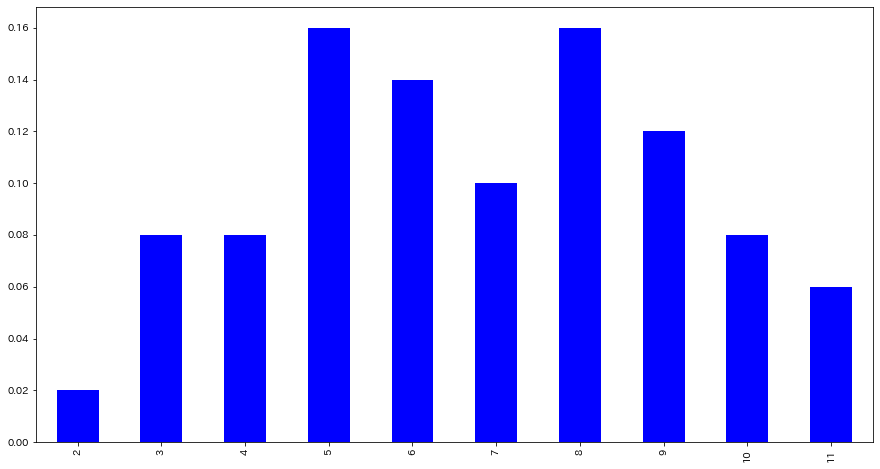

In [21]:
# Using relative frequency, we can rescale the frequency so that we can compare results from different number of trials
# 相対頻度を求める

relative_freq = sort_freq/trial
relative_freq.plot(kind='bar', color='blue', figsize=(15, 8))

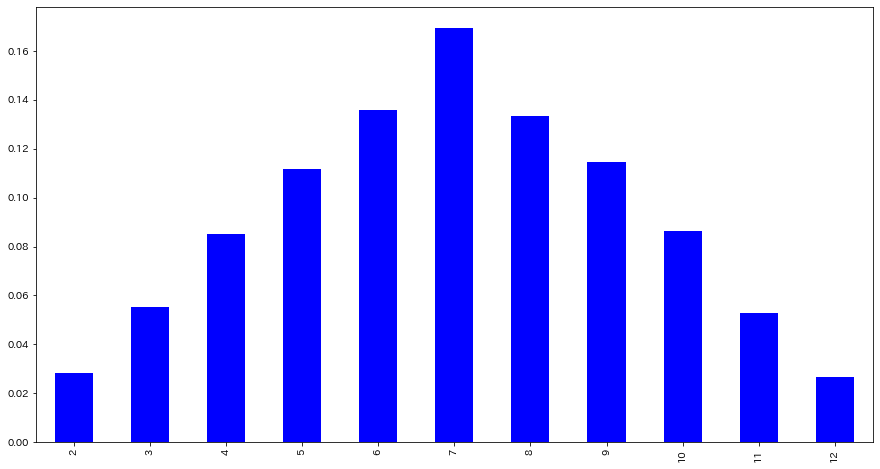

In [22]:
# Let us try to increase the number of trials to 10000, and see what will happen...
# 試行回数を増やす

trial = 10000
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]
freq = pd.DataFrame(results)[0].value_counts()
sort_freq = freq.sort_index()
relative_freq = sort_freq/trial
relative_freq.plot(kind='bar', color='blue', figsize=(15, 8))

In [23]:
# We can see that with more trials, the result looks more and more stable, and this is very close to a probability distribution. Try increasing the number of "trial" further (but it may take some time for Jupyter Notebook to output the result)
# より多くの試行で結果がますます安定して見え、これは確率分布に非常に近いことがわかります。
# Expectation and Variance of a distribution
# assume that we have fair dice, which means all faces will be shown with equal probability
# then we can say we know the 'Distribtuion' of the random variable - sum_of_dice

X_distri = pd.DataFrame(index=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])  #2個合計のパターン数
X_distri['Prob'] = [1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1] #各パターンが出現する組み合わせ数
X_distri['Prob'] = X_distri['Prob']/36
X_distri

,Prob
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333
11,0.055556


In [24]:
# 理論値での平均と分散
mean = pd.Series(X_distri.index * X_distri['Prob']).sum()
var = pd.Series(((X_distri.index - mean)**2)*X_distri['Prob']).sum()
#Output the mean and variance of the distribution. Mean and variance can be used to describe a distribution
# 分布の平均と分散を出力
print(mean, var)

6.999999999999998 5.833333333333333


In [25]:
# Empirical mean and variance / 経験的平均と分散
# if we calculate mean and variance of outcomes (with high enough number of trials, eg 20000)...
# 結果の平均と分散を計算する場合（十分な試行回数、たとえば20000）

trial = 20000
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]
#print the mean and variance of the 20000 trials
results = pd.Series(results)
print(results.mean(), results.var())

7.0095 5.808500175010469
